# Predicting medical insruance premium using machine learning algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
# Read the dataset
data = pd.read_csv('insurance.csv')
print("The amount of datapoint is", len(data))
data.head()

The amount of datapoint is 1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Summary of insurance data (for numeric attributes like: Age, BMI, Children, Charges)
data_Transpose = data.describe()
data_Transpose.T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
# Data observations
pd.DataFrame(data.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

,Unique Values
sex,2
smoker,2
region,4
children,6
age,47
bmi,548
charges,1337


In [6]:
# Information relating to every feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Check for NULL or missing value
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data

This dataset has 6 variable:

Age: age of primary beneficiary  
Sex: insurance contractor gender, female/male  
BMI: (Body Mass Index) Provide an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kh/m^2) using ratio of height to weight, ideally shoudl be 18.5 to 24.9.  
Children: number of children covered by health insurance/Number of dependents.  
Smoker: is the person a smoker or not.  
Region: beneficiary's residential area in the US; Northeast, Southeast, Southwest, Northwest. 
Charges: individual medical costs billed by health insurance.

## Applies One-Hot Encoding

### Encoding the categorical features "Sex, Smoker, Region"

In [8]:
# Assigning values for 'smoker' feature
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [9]:
# As we know that 'sex' and 'region' are nominal categorical variables
# We will create dummy variable
dummies = pd.get_dummies(data['sex'])
# Let's have a look
dummies

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [10]:
# One-Hot Encoder
# We will use this method to feed this feature to the machine
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(data[['region']]).toarray()

In [11]:
# Let's see the following categories in column region
feature_labels = ohe.categories_
print(feature_labels)

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


In [12]:
# Creating one array
feature_labels = np.array(feature_labels).ravel()
print(feature_labels)

['northeast' 'northwest' 'southeast' 'southwest']


In [13]:
# We are now making a data frame of these labels
features = pd.DataFrame(feature_array, columns = feature_labels)
features

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [14]:
# We will now join the dummy variable and OHE columns to original dataset
data_new = pd.concat([data, dummies, features], axis=1)
data_new = data_new.drop(columns='region', axis=1)
data_new = data_new.drop(columns='sex', axis=1)
data_new

,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,2205.98080,1,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,1629.83350,1,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,2007.94500,1,0,0.0,0.0,0.0,1.0


In [15]:
#Check for duplicate?
data_new.duplicated().sum()

1

In [16]:
# Creating a DataFrame object
df = data_new
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
581,19,30.59,0,0,1639.5631,0,1,0.0,1.0,0.0,0.0


In [17]:
#Remove Duplicate Value
data_new = df.drop_duplicates()

#Check Duplicate Value
data_new.duplicated().sum()

0

In [18]:
# Now every feature is numerical
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1337 non-null   int64  
 1   bmi        1337 non-null   float64
 2   children   1337 non-null   int64  
 3   smoker     1337 non-null   int64  
 4   charges    1337 non-null   float64
 5   female     1337 non-null   uint8  
 6   male       1337 non-null   uint8  
 7   northeast  1337 non-null   float64
 8   northwest  1337 non-null   float64
 9   southeast  1337 non-null   float64
 10  southwest  1337 non-null   float64
dtypes: float64(6), int64(3), uint8(2)
memory usage: 107.1 KB


In [19]:
# Summary of insurance data for new data with duplicate removed (for numeric attributes like: Age, BMI, Children, Charges)
data_Transpose = data_new.describe()
data_Transpose.T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
smoker,1337.0,0.204936,0.403806,0.0000,0.000,0.0000,0.00000,1.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801
female,1337.0,0.495138,0.500163,0.0000,0.000,0.0000,1.00000,1.00000
male,1337.0,0.504862,0.500163,0.0000,0.000,1.0000,1.00000,1.00000
northeast,1337.0,0.242334,0.428655,0.0000,0.000,0.0000,0.00000,1.00000
northwest,1337.0,0.242334,0.428655,0.0000,0.000,0.0000,0.00000,1.00000
southeast,1337.0,0.272251,0.445285,0.0000,0.000,0.0000,1.00000,1.00000


C:\Users\renny\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


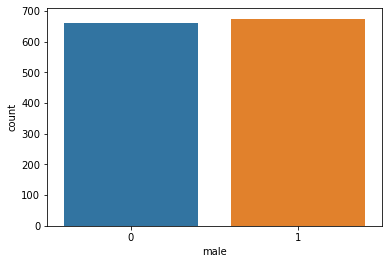

In [20]:
sns.countplot(data_new.male)
plt.show()

As seen from above bar chart, there exists almost equal number of males and females. (0 = female, 1 = male)

C:\Users\renny\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


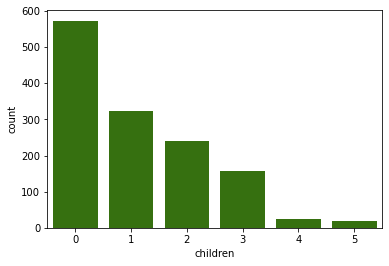

In [21]:
sns.countplot(data_new.children, color=[0.2,0.5,0.0])
plt.show()

As seen from above bar chart, most indiviuals don't have children.

C:\Users\renny\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


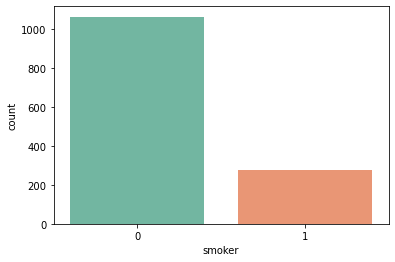

In [22]:
sns.countplot(data_new.smoker, palette="Set2")
plt.show()

As seen from above bar chart, very few individuals are smoker as most of them are non-smoker. (0 = non-smoker, 1 = smoker)

C:\Users\renny\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


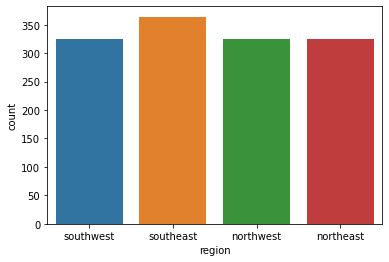

In [23]:
sns.countplot(data.region)
plt.show()

As seen from above bar chart, individuals from different regions are roughly equal represented.

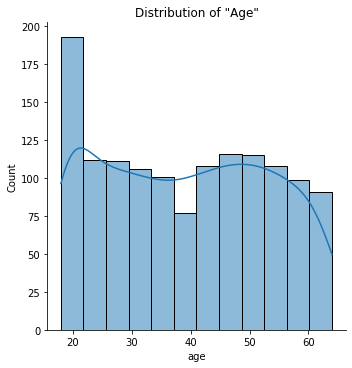

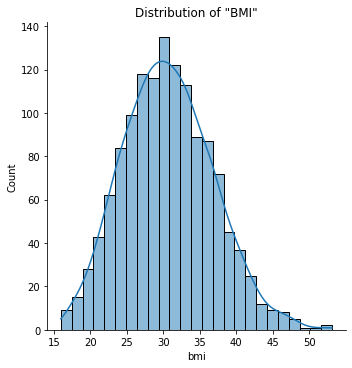

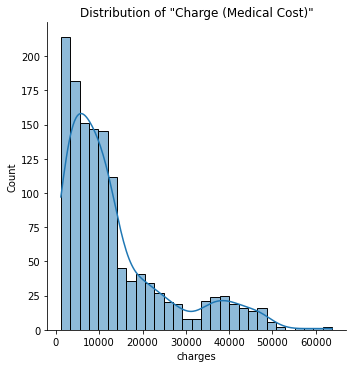

In [24]:
# Plot distributons for "Age", "BMI", "Charges" festures
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data_new['age'], kde=True).set(title='Distribution of "Age"')
sns.displot(data_new['bmi'], kde=True).set(title='Distribution of "BMI"')
sns.displot(data_new['charges'], kde=True).set(title='Distribution of "Charge (Medical Cost)"')

Conclusion drawn from above diagram is that there are lots of people in their 20s, whilst many of them are fairly healthy (BMI score from 18 to 25 is normal, >25 to 30 overweight, >40 is obese), and most insurnace charge being in the range from 0 to $15 000. 

In [25]:
data_new.describe()

,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,0.204936,13279.121487,0.495138,0.504862,0.242334,0.242334,0.272251,0.243082
std,14.044333,6.100468,1.205571,0.403806,12110.359656,0.500163,0.500163,0.428655,0.428655,0.445285,0.429104
min,18.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,0.000000,4746.344000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,0.000000,9386.161300,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.700000,2.000000,0.000000,16657.717450,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Scaling the data
Scaler = StandardScaler()
Scaler.fit(data_new)
data_scaled = pd.DataFrame(Scaler.transform(data_new), columns= data_new.columns)
data_scaled

,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
0,-1.440418,-0.453160,-0.909234,1.969660,0.297857,1.009771,-1.009771,-0.565546,-0.565546,-0.611638,1.764609
1,-1.511647,0.509422,-0.079442,-0.507702,-0.954381,-0.990324,0.990324,-0.565546,-0.565546,1.634955,-0.566698
2,-0.799350,0.383155,1.580143,-0.507702,-0.729373,-0.990324,0.990324,-0.565546,-0.565546,1.634955,-0.566698
3,-0.443201,-1.305052,-0.909234,-0.507702,0.719104,-0.990324,0.990324,-0.565546,1.768203,-0.611638,-0.566698
4,-0.514431,-0.292456,-0.909234,-0.507702,-0.777499,-0.990324,0.990324,-0.565546,1.768203,-0.611638,-0.566698
...,...,...,...,...,...,...,...,...,...,...,...
1332,0.767704,0.050269,1.580143,-0.507702,-0.221263,-0.990324,0.990324,-0.565546,1.768203,-0.611638,-0.566698
1333,-1.511647,0.206053,-0.909234,-0.507702,-0.914695,1.009771,-1.009771,1.768203,-0.565546,-0.611638,-0.566698
1334,-1.511647,1.014490,-0.909234,-0.507702,-0.962287,1.009771,-1.009771,-0.565546,-0.565546,1.634955,-0.566698
1335,-1.297958,-0.797524,-0.909234,-0.507702,-0.931054,1.009771,-1.009771,-0.565546,-0.565546,-0.611638,1.764609


<AxesSubplot:>

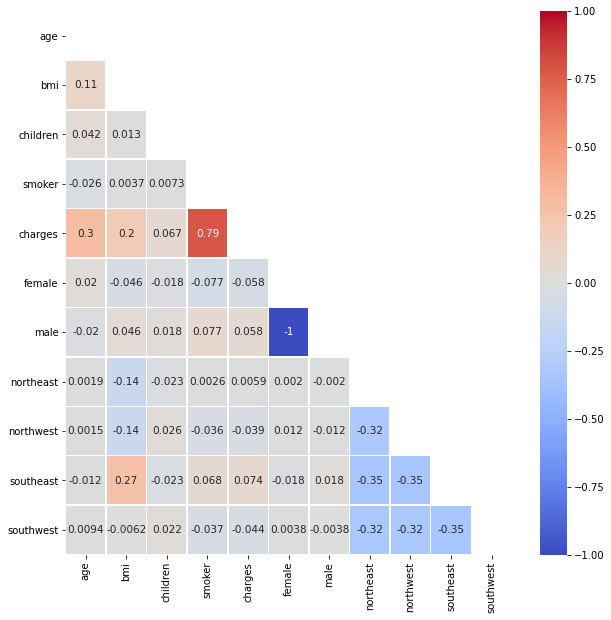

In [27]:
#correlation matrix
matrix = np.triu(data_scaled.corr())
plt.figure(figsize=(10,10)) 
sns.heatmap(data_scaled.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',annot=True,annot_kws={"size": 10.5},linewidths=.5, mask=matrix)

As seen from above heatmap, insurance charges greatly depends upon features like Smoker and Age.

## Find the most influencing feature (Feature importance)

In [28]:
x = data_new.drop(['charges'], axis = 1)
y = data_new.charges
x

,age,bmi,children,smoker,female,male,northeast,northwest,southeast,southwest
0,19,27.900,0,1,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,1,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,1,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,1,0,0.0,0.0,0.0,1.0


In [29]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [31]:
print(selection.feature_importances_)

[0.12950826 0.19035267 0.02377542 0.62056564 0.00570689 0.0056384
 0.00623986 0.00682903 0.00662728 0.00475654]


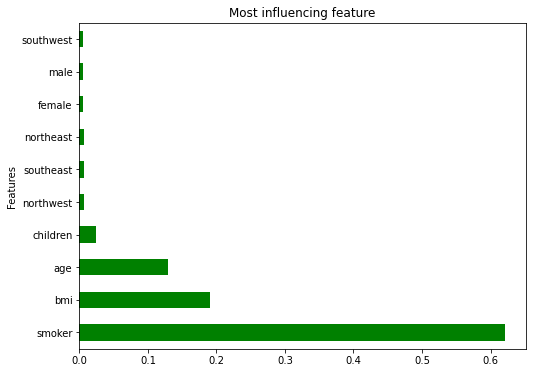

In [32]:
plt.figure(figsize = (8,6))
plt.title("Most influencing feature")
plt.ylabel('Features')
feature_importances = pd.Series(selection.feature_importances_, index=x.columns)
feature_importances.nlargest(20).plot(kind='barh', color = 'green')
plt.show()

From the above bar chart, it clearly indicates that smoker is the most influencing feature for insurance charge.

In [33]:
# Training and testing data (using 80:20)
X = data_scaled.drop('charges',axis=1).values
y = data_scaled['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, shuffle=True)

print('Size of X_train : ', X_train.shape)
print('Size of Y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1069, 10)
Size of Y_train :  (1069, 1)
Size of X_test :  (268, 10)
Size of Y_test :  (268, 1)


## 6 types of regression machine learning algoirthms

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Data Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Model Evaluation
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Model Selection
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import train_test_split

In [35]:
def model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
#    y_pred_model_train = model.predict(X_train)
#    y_pred_model_test = model.predict(X_test)
#    accuracy_model_train = r2_score(y_train, y_pred_model_train)
#    print("Training Accuracy: ", accuracy_model_train)
#    accuracy_model_test = r2_score(y_test, y_pred_model_test)
#    print("Testing Accuracy: ", accuracy_model_test)
#    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
#    print("RMSE for Training Data: ", RMSE_model_train)
#    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
#    print("RMSE for Testing Data: ", RMSE_model_test)
#     if model == polynomial_reg:
#         polynomial_features = PolynomialFeatures(degree=3)
#         y_pred_cv_PR = cross_val_predict(model, polynomial_features.fit_transform(X), y, cv=20)
#     else:
    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

In [36]:
from math import sqrt 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### 1) multiple linear regression

In [37]:
lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))
print('MSE train data: %.4f, MSE test data: %.4f' % (
mean_squared_error(y_train,y_train_pred),
mean_squared_error(y_test,y_test_pred)))
#print('MAE train data: %.3f, MAE test data: %.3f' % (
#mean_absolute_error(y_train,y_train_pred),
#mean_absolute_error(y_test,y_test_pred)))
print('R2 train data: %.4f, R2 test data: %.4f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

0.8059373025184005
MSE train data: 0.2537, MSE test data: 0.2433
R2 train data: 0.7285, R2 test data: 0.8059


In [38]:
multiple_linear_reg = LinearRegression(fit_intercept=False)  
multiple_linear_reg.fit(X_train, y_train)  
model_summary(multiple_linear_reg, "Multiple_linear_Regression")

Multiple_linear_Regression
Accuracy for 20 - Fold Cross Predicted:  0.7467109263474498


### 2) random forest

In [39]:
forest = RandomForestRegressor(n_estimators = 400,
                              criterion = 'mse',
                              random_state = 42,
                              n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print(forest.score(X_test,y_test))
print('MSE train data: %.4f, MSE test data: %.4f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))

print('R2 train data: %.4f, R2 test data: %.4f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

0.8837709129966871
MSE train data: 0.0223, MSE test data: 0.1457
R2 train data: 0.9761, R2 test data: 0.8838


In [40]:
import warnings
warnings.filterwarnings("ignore")
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=42)  
random_forest_reg.fit(X_train, y_train) 
model_summary(random_forest_reg, "Random_Forest_Regression")

Random_Forest_Regression
Accuracy for 20 - Fold Cross Predicted:  0.8590484817110291


### 3) Gradient Boosting Regressor

In [41]:
import warnings
warnings.filterwarnings("ignore")
boost = GradientBoostingRegressor(n_estimators = 50, criterion = 'mse', random_state = 42)
boost.fit(X_train,y_train)
boost_train_pred = boost.predict(X_train)
boost_test_pred = boost.predict(X_test)

print(boost.score(X_test,y_test))
print('MSE train data: %.4f, MSE test data: %.4f' % (
mean_squared_error(y_train,boost_train_pred),
mean_squared_error(y_test,boost_test_pred)))
print('R2 train data: %.4f, R2 test data: %.4f' % (
r2_score(y_train,boost_train_pred),
r2_score(y_test,boost_test_pred)))

0.9016813507669226
MSE train data: 0.1180, MSE test data: 0.1233
R2 train data: 0.8737, R2 test data: 0.9017


In [42]:
import warnings
warnings.filterwarnings("ignore")
boost = GradientBoostingRegressor(n_estimators = 50, criterion = 'friedman_mse', random_state = 42)
boost.fit(X_train,y_train)
boost_train_pred = boost.predict(X_train)
boost_test_pred = boost.predict(X_test)

print(boost.score(X_test,y_test))
print('MSE train data: %.4f, MSE test data: %.4f' % (
mean_squared_error(y_train,boost_train_pred),
mean_squared_error(y_test,boost_test_pred)))

print('R2 train data: %.4f, R2 test data: %.4f' % (
r2_score(y_train,boost_train_pred),
r2_score(y_test,boost_test_pred)))

0.9016813507669226
MSE train data: 0.1180, MSE test data: 0.1233
R2 train data: 0.8737, R2 test data: 0.9017


### 4) XGBoost

In [43]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [2, 3, 4, 5],
              "n_estimators": [200, 300, 400, 500],
              "learning_rate": [0.005, 0.01, 0.015, 0.02]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=20).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [44]:
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

regressor.fit(X_train, y_train)
#=========================================================================
# To use early_stopping_rounds: 
# "Validation metric needs to improve at least once in every 
# early_stopping_rounds round(s) to continue training."
#=========================================================================
# first perform a test/train split 
#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size = 0.2)
#regressor.fit(X_train, y_train, early_stopping_rounds=6, eval_set=[(X_test, y_test)], verbose=False)

#=========================================================================
# use the model to predict the prices for the test data
#=========================================================================
y_predict_test = regressor.predict(X_test)
y_predict_train = regressor.predict(X_train)

In [47]:
# Evaluation Metrics
xgb_reg_mse_test = mean_squared_error(y_test, y_predict_test)
xgb_reg_r2_score_test = r2_score(y_test, y_predict_test )
xgb_reg_mse_train = mean_squared_error(y_train, y_predict_train)
xgb_reg_r2_score_train = r2_score(y_train, y_predict_train )

#: %.3f
print("The mean square error (test) using XGBoost is {}".format(xgb_reg_mse_test))
print("The r2 score (test) using XGBoost is {}".format(xgb_reg_r2_score_test))
print("The mean square error (train) using XGBoost is {}".format(xgb_reg_mse_train))
print("The r2 score (train) using XGBoost is {}".format(xgb_reg_r2_score_train))

The mean square error (test) using XGBoost is 0.12312659077364525
The r2 score (test) using XGBoost is 0.9018027540405242
The mean square error (train) using XGBoost is 0.12078697122823001
The r2 score (train) using XGBoost is 0.8707116955121086


### 5) Support Vector Machine (Regression)

In [48]:
X_train_scaled = StandardScaler().fit_transform(X_train)
y_train_scaled = StandardScaler().fit_transform(y_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
y_test_scaled = StandardScaler().fit_transform(y_test)
svr = SVR()

In [49]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=20, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 20 folds for each of 50 candidates, totalling 1000 fits


GridSearchCV(cv=20, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [50]:
#svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=10, gamma=0.01, tol=0.0001)
0.8199334353713601


In [51]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

#rmse_svr_train = (np.sqrt(mean_squared_error(y_train_scaled, y_pred_svr_train)))
#rmse_svr_test = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))
mse_svr_train = ((mean_squared_error(y_train_scaled, y_pred_svr_train)))
mse_svr_test = ((mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('CV : {0:.4f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.4f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.4f}'.format(r2_score_svr_test))
#print('RMSE (train) : {0:.3f}'.format(rmse_svr_train))
#print('RMSE (test): {0:.3f}'.format(rmse_svr_test))
print('MSE (train) : {0:.4f}'.format(mse_svr_train))
print('MSE (test): {0:.4f}'.format(mse_svr_test))

CV : 0.8199
R2_score (train) : 0.8400
R2 score (test) : 0.8829
MSE (train) : 0.1600
MSE (test): 0.1171


### 6) Multiplayer Neural Network Regression

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import optimizers

### Single hidden layer

In [53]:
# 1 hidden layer
model = Sequential() ### relu activation the best
bias_initializer="RandomNormal"
kernel_initializer="RandomNormal"
kernel_regularizer='l2'# # 'l2','l1_l2'
activation_initial='relu'
learning_rate = 0.00075
#sgd=optimizers.Adamax(lr=learning_rate)    
optimiser=optimizers.Adam(lr=learning_rate)

model.add(Dense(390, input_dim=10, use_bias=False, bias_initializer=bias_initializer, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer, activation=activation_initial))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 390)               3900      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 391       
Total params: 4,291
Trainable params: 4,291
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])   ## metrics = ['mse','mae']

#### Validation

In [55]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32,  verbose=1, validation_split=0.2)

Epoch 1/100
27/27 [==============================] - 1s 9ms/step - loss: 0.6701 - mse: 0.5741 - val_loss: 0.4610 - val_mse: 0.3672
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3424 - mse: 0.2506 - val_loss: 0.3093 - val_mse: 0.2206
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.2867 - mse: 0.2020 - val_loss: 0.2704 - val_mse: 0.1903
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.2613 - mse: 0.1848 - val_loss: 0.2444 - val_mse: 0.1712
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.2452 - mse: 0.1746 - val_loss: 0.2256 - val_mse: 0.1583
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.2319 - mse: 0.1675 - val_loss: 0.2161 - val_mse: 0.1542
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 0.2235 - mse: 0.1636 - val_loss: 0.2040 - val_mse: 0.1466
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.2161 - m

27/27 [==============================] - 0s 3ms/step - loss: 0.1629 - mse: 0.1459 - val_loss: 0.1609 - val_mse: 0.1439
Epoch 64/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1657 - mse: 0.1487 - val_loss: 0.1622 - val_mse: 0.1451
Epoch 65/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1625 - mse: 0.1454 - val_loss: 0.1596 - val_mse: 0.1427
Epoch 66/100
27/27 [==============================] - 0s 3ms/step - loss: 0.1622 - mse: 0.1453 - val_loss: 0.1723 - val_mse: 0.1556
Epoch 67/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1661 - mse: 0.1495 - val_loss: 0.1617 - val_mse: 0.1447
Epoch 68/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1694 - mse: 0.1526 - val_loss: 0.1654 - val_mse: 0.1487
Epoch 69/100
27/27 [==============================] - 0s 3ms/step - loss: 0.1664 - mse: 0.1495 - val_loss: 0.1572 - val_mse: 0.1405
Epoch 70/100
27/27 [==============================] - 0s 3ms/step - loss: 0.1649 - mse: 0

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


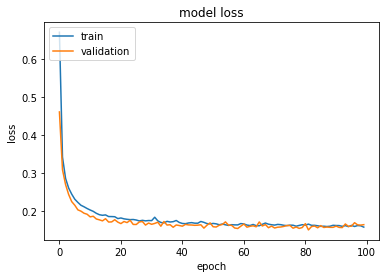

In [57]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Testing data

In [58]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32,  verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1624 - mse: 0.1471 - val_loss: 0.1517 - val_mse: 0.1365
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1592 - mse: 0.1441 - val_loss: 0.1607 - val_mse: 0.1456
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1632 - mse: 0.1481 - val_loss: 0.1625 - val_mse: 0.1477
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1652 - mse: 0.1503 - val_loss: 0.1584 - val_mse: 0.1436
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1593 - mse: 0.1445 - val_loss: 0.1637 - val_mse: 0.1491
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1635 - mse: 0.1488 - val_loss: 0.1507 - val_mse: 0.1359
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1573 - mse: 0.1427 - val_loss: 0.1574 - val_mse: 0.1429
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1577 - m

34/34 [==============================] - 0s 3ms/step - loss: 0.1544 - mse: 0.1414 - val_loss: 0.1606 - val_mse: 0.1475
Epoch 64/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1523 - mse: 0.1392 - val_loss: 0.1522 - val_mse: 0.1394
Epoch 65/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1520 - mse: 0.1390 - val_loss: 0.1485 - val_mse: 0.1355
Epoch 66/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1520 - mse: 0.1390 - val_loss: 0.1547 - val_mse: 0.1417
Epoch 67/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1510 - mse: 0.1381 - val_loss: 0.1543 - val_mse: 0.1414
Epoch 68/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1513 - mse: 0.1384 - val_loss: 0.1511 - val_mse: 0.1382
Epoch 69/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1559 - mse: 0.1429 - val_loss: 0.1459 - val_mse: 0.1330
Epoch 70/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1527 - mse: 0

#### R^2 result

In [59]:
import sklearn.metrics
r2_test=sklearn.metrics.r2_score(y_test,model.predict(X_test))
r2_train=sklearn.metrics.r2_score(y_train,model.predict(X_train))
#Evaluation of  the explained variance score (R^2)
print('R2 Score (Test) :', r2_test)
print('R2 Score (Train) :', r2_train)

R2 Score (Test) : 0.8896091240653483
R2 Score (Train) : 0.8560743309811805


### 2 hidden layers

In [60]:
model2 = Sequential() ### relu activation the best
bias_initializer="RandomNormal"
kernel_initializer="RandomNormal"
kernel_regularizer='l2'# # 'l2','l1_l2'
activation_initial='relu'
learning_rate = 0.00075
#sgd=optimizers.Adamax(lr=learning_rate)    
optimiser=optimizers.Adam(lr=learning_rate)

model2.add(Dense(390, input_dim=10, use_bias=False, bias_initializer=bias_initializer, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer, activation=activation_initial))
model2.add(Dense(180,use_bias=False, bias_initializer=bias_initializer, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,activation=activation_initial))
model2.add(Dense(1, activation='linear'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 390)               3900      
_________________________________________________________________
dense_3 (Dense)              (None, 180)               70200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 181       
Total params: 74,281
Trainable params: 74,281
Non-trainable params: 0
_________________________________________________________________


In [61]:
 model2.compile(loss='mse', optimizer=optimiser, metrics=['mse'])

In [62]:
## history = model2.fit(X_train, y_train, epochs=128, batch_size=64,  verbose=1, validation_split=0.2) validation_data=(X_test, y_test)

#### Validation data

In [63]:
history = model2.fit(X_train, y_train, epochs=100, batch_size=32,verbose=1, validation_split=0.2)

Epoch 1/100
27/27 [==============================] - 1s 7ms/step - loss: 2.0487 - mse: 0.4347 - val_loss: 1.5939 - val_mse: 0.2325
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 1.3642 - mse: 0.2102 - val_loss: 1.1385 - val_mse: 0.1850
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.9899 - mse: 0.1754 - val_loss: 0.8420 - val_mse: 0.1623
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.7503 - mse: 0.1664 - val_loss: 0.6505 - val_mse: 0.1587
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5901 - mse: 0.1630 - val_loss: 0.5088 - val_mse: 0.1444
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 0.4824 - mse: 0.1637 - val_loss: 0.4165 - val_mse: 0.1395
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4049 - mse: 0.1602 - val_loss: 0.3649 - val_mse: 0.1502
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.3532 - m

27/27 [==============================] - 0s 4ms/step - loss: 0.1796 - mse: 0.1457 - val_loss: 0.1704 - val_mse: 0.1363
Epoch 64/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1761 - mse: 0.1420 - val_loss: 0.1867 - val_mse: 0.1529
Epoch 65/100
27/27 [==============================] - 0s 3ms/step - loss: 0.1802 - mse: 0.1464 - val_loss: 0.1725 - val_mse: 0.1380
Epoch 66/100
27/27 [==============================] - 0s 3ms/step - loss: 0.1788 - mse: 0.1453 - val_loss: 0.1660 - val_mse: 0.1314
Epoch 67/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1783 - mse: 0.1441 - val_loss: 0.1745 - val_mse: 0.1397
Epoch 68/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1828 - mse: 0.1490 - val_loss: 0.1822 - val_mse: 0.1490
Epoch 69/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1812 - mse: 0.1476 - val_loss: 0.1754 - val_mse: 0.1413
Epoch 70/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1802 - mse: 0

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


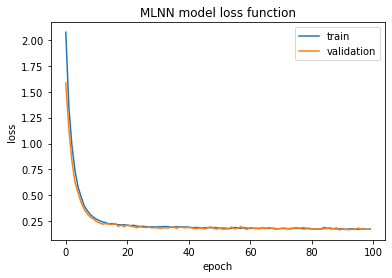

In [123]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLNN model loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#### Testing data

In [124]:
history = model2.fit(X_train, y_train, epochs=100, batch_size=32,verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1757 - mse: 0.1454 - val_loss: 0.1578 - val_mse: 0.1273
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1733 - mse: 0.1435 - val_loss: 0.1594 - val_mse: 0.1299
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1745 - mse: 0.1447 - val_loss: 0.1651 - val_mse: 0.1357
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1698 - mse: 0.1406 - val_loss: 0.1806 - val_mse: 0.1509
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1776 - mse: 0.1481 - val_loss: 0.1735 - val_mse: 0.1437
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1788 - mse: 0.1495 - val_loss: 0.1689 - val_mse: 0.1398
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1744 - mse: 0.1449 - val_loss: 0.1756 - val_mse: 0.1460
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 0.1754 - m

#### R^2 results

In [64]:
import sklearn.metrics
r2_test=sklearn.metrics.r2_score(y_test,model2.predict(X_test))
r2_train=sklearn.metrics.r2_score(y_train,model2.predict(X_train))
#Evaluation of  the explained variance score (R^2)
print('R2 Score (Test) :', r2_test)
print('R2 Score (Train) :', r2_train)

R2 Score (Test) : 0.894972737698623
R2 Score (Train) : 0.8519554195321347


In [65]:
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
classifier = Sequential()

### 3 hidden layers

In [66]:
model3 = Sequential() ### relu activation the best
bias_initializer="RandomNormal"
kernel_initializer="RandomNormal"
kernel_regularizer='l2'# # 'l2','l1_l2'
activation_initial='relu'
learning_rate = 0.00075
#sgd=optimizers.Adamax(lr=learning_rate)    
optimiser=optimizers.Adam(lr=learning_rate)

model3.add(Dense(390, input_dim=10, use_bias=False, bias_initializer=bias_initializer, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer, activation=activation_initial))
model3.add(Dense(180,use_bias=False, bias_initializer=bias_initializer, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,activation=activation_initial))
model3.add(Dense(90,use_bias=False, bias_initializer=bias_initializer, kernel_initializer=kernel_initializer, kernel_regularizer=kernel_regularizer,activation=activation_initial))
model3.add(Dense(1, activation='linear'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 390)               3900      
_________________________________________________________________
dense_6 (Dense)              (None, 180)               70200     
_________________________________________________________________
dense_7 (Dense)              (None, 90)                16200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 91        
Total params: 90,391
Trainable params: 90,391
Non-trainable params: 0
_________________________________________________________________


In [67]:
 model3.compile(loss='mse', optimizer=optimiser, metrics=['mse'])

In [68]:
## Validation data
history = model3.fit(X_train, y_train, epochs=100, batch_size=32,verbose=1, validation_split=0.2)

Epoch 1/100
27/27 [==============================] - 1s 7ms/step - loss: 2.3450 - mse: 0.4757 - val_loss: 1.7641 - val_mse: 0.2424
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 1.4795 - mse: 0.2189 - val_loss: 1.1831 - val_mse: 0.1611
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 1.0339 - mse: 0.1761 - val_loss: 0.8693 - val_mse: 0.1677
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.7687 - mse: 0.1696 - val_loss: 0.6516 - val_mse: 0.1494
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.6039 - mse: 0.1715 - val_loss: 0.5234 - val_mse: 0.1523
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4984 - mse: 0.1726 - val_loss: 0.4426 - val_mse: 0.1572
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4211 - mse: 0.1667 - val_loss: 0.3772 - val_mse: 0.1495
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 0.3674 - m

Epoch 63/100
27/27 [==============================] - 0s 2ms/step - loss: 0.1948 - mse: 0.1409 - val_loss: 0.1958 - val_mse: 0.1432
Epoch 64/100
27/27 [==============================] - 0s 3ms/step - loss: 0.2013 - mse: 0.1479 - val_loss: 0.1994 - val_mse: 0.1463
Epoch 65/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1973 - mse: 0.1434 - val_loss: 0.2042 - val_mse: 0.1521
Epoch 66/100
27/27 [==============================] - 0s 4ms/step - loss: 0.2031 - mse: 0.1504 - val_loss: 0.1933 - val_mse: 0.1389
Epoch 67/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1988 - mse: 0.1443 - val_loss: 0.2169 - val_mse: 0.1646
Epoch 68/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1991 - mse: 0.1455 - val_loss: 0.1896 - val_mse: 0.1359
Epoch 69/100
27/27 [==============================] - 0s 4ms/step - loss: 0.1930 - mse: 0.1393 - val_loss: 0.1927 - val_mse: 0.1383
Epoch 70/100
27/27 [==============================] - 0s 5ms/step - loss: 0.

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


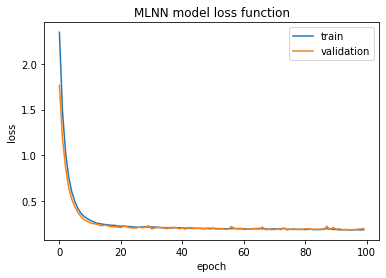

In [69]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLNN model loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [70]:
## Testing data
history = model2.fit(X_train, y_train, epochs=100, batch_size=32,verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1725 - mse: 0.1416 - val_loss: 0.1558 - val_mse: 0.1250
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1692 - mse: 0.1394 - val_loss: 0.1639 - val_mse: 0.1343
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1701 - mse: 0.1407 - val_loss: 0.1553 - val_mse: 0.1258
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1700 - mse: 0.1407 - val_loss: 0.1615 - val_mse: 0.1323
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1728 - mse: 0.1439 - val_loss: 0.1668 - val_mse: 0.1378
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1757 - mse: 0.1467 - val_loss: 0.1668 - val_mse: 0.1376
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1714 - mse: 0.1421 - val_loss: 0.1710 - val_mse: 0.1428
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1759 - m

34/34 [==============================] - 0s 2ms/step - loss: 0.1607 - mse: 0.1353 - val_loss: 0.1575 - val_mse: 0.1320
Epoch 64/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1623 - mse: 0.1371 - val_loss: 0.1516 - val_mse: 0.1269
Epoch 65/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1651 - mse: 0.1402 - val_loss: 0.1541 - val_mse: 0.1295
Epoch 66/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1617 - mse: 0.1369 - val_loss: 0.1567 - val_mse: 0.1312
Epoch 67/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1618 - mse: 0.1369 - val_loss: 0.1666 - val_mse: 0.1418
Epoch 68/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1607 - mse: 0.1349 - val_loss: 0.1654 - val_mse: 0.1399
Epoch 69/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1636 - mse: 0.1388 - val_loss: 0.1559 - val_mse: 0.1303
Epoch 70/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1607 - mse: 0

In [73]:
## R^2 results
import sklearn.metrics
r2_test=sklearn.metrics.r2_score(y_test,model2.predict(X_test))
r2_train=sklearn.metrics.r2_score(y_train,model2.predict(X_train))
#Evaluation of  the explained variance score (R^2)
print('R2 Score (Test) :', r2_test)
print('R2 Score (Train) :', r2_train)

R2 Score (Test) : 0.8931713753458062
R2 Score (Train) : 0.8595201017554956


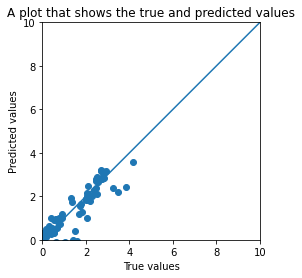

In [74]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.plot([0, 10], [0, 10])